<img src='https://einsteinmarketer.ams3.digitaloceanspaces.com/em/uploads/2019/06/twitter-logo.png' width="500" height="200" style="float: left;"></img>
<img src='https://www.kindpng.com/picc/m/1-11743_filmklappe-film-cinema-hatch-synchronously-icon-film-icon.png' width="220" height="220" style="float: left;"></img>

<h1>Data Analysis using Movie Tweetings data.</h1>

## Each stage of the CRISP-DM process. These stages are:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results (Insight)

## About Dataset
MovieTweetings is a dataset consisting of ratings on movies that were contained in well-structured tweets on Twitter. This dataset is the result of research conducted by [Simon Dooms] (http://scholar.google.be/citations?user=owaD8qkAAAAJ) (Ghent University, Belgium) and has been presented on the CrowdRec 2013 workshop which is co-located with the ACM RecSys 2013 conference. Please cite the corresponding paper if you make use of this dataset. The presented slides can be found [on slideshare] (http://www.slideshare.net/simondooms/movie-tweetings-a-movie-rating-dataset-collected-from-twitter).


# Business Understanding

In this notebook, I will be exploring the MovieTweetings data,<br>
These are the questions that I will seek to answer in order to get this information:

* Q: What are the top 10 highest rated movies in twitter?
* Q: What are the top 10 most reviewed movies on twitter?
* Q: Which twitter users are potential candidates to get hired from a movie reviewing company?
* Q: Which genres are popular for movies?

In [22]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding and Preparation

In order to gain some understanding of the data. I have to do these steps:
* Handle categorical and missing data
* Drop unwanted columns
* Analyze

In [23]:
# reading dataset
movies = pd.read_csv('./data/movies_clean.csv')
reviews = pd.read_csv('./data/reviews_clean.csv')

In [24]:
movies.head()

,Unnamed: 0,movie_id,movie,genre,date,1800's,1900's,2000's,Documentary,Adventure,...,War,Romance,Musical,Film-Noir,Sport,Mystery,Western,Horror,Comedy,Music
0,0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,1894,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10,La sortie des usines Lumière (1895),Documentary|Short,1895,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,12,The Arrival of a Train (1896),Documentary|Short,1896,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,25,The Oxford and Cambridge University Boat Race ...,NaN,1895,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,91,Le manoir du diable (1896),Short|Horror,1896,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
reviews.head()

,Unnamed: 0,user_id,movie_id,rating,timestamp,date
0,0,1,114508,8,1381006850,2013-10-05 21:00:50
1,1,2,208092,5,1586466072,2020-04-09 21:01:12
2,2,2,358273,9,1579057827,2020-01-15 03:10:27
3,3,2,10039344,5,1578603053,2020-01-09 20:50:53
4,4,2,6751668,9,1578955697,2020-01-13 22:48:17


In [26]:
reviews['rating'].describe()

count    100001.000000
mean          7.397666
std           1.833944
min           0.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

In [27]:
# drop unwanted columns
movies = movies.drop(['Unnamed: 0'], axis=1)
reviews = reviews.drop(['Unnamed: 0'], axis=1)

In [28]:
#checking for columns with null value
movies.isna().sum()

movie_id         0
movie            0
genre          249
date             0
1800's           0
1900's           0
2000's           0
Documentary      0
Adventure        0
Animation        0
Thriller         0
Reality-TV       0
Action           0
Adult            0
Game-Show        0
Fantasy          0
Crime            0
Talk-Show        0
Drama            0
Family           0
History          0
News             0
Sci-Fi           0
Short            0
Biography        0
War              0
Romance          0
Musical          0
Film-Noir        0
Sport            0
Mystery          0
Western          0
Horror           0
Comedy           0
Music            0
dtype: int64

In [29]:
#checking for columns with null value
reviews.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
date         0
dtype: int64

In [30]:
#find movies with no genre 
movies_id = movies[movies['genre'].isna() == True]['movie_id']

In [31]:
len(reviews[reviews.movie_id.isin(movies_id)])

50

* Since we have 50 reivews of movies with no genre, dropping the movies with no genre is not a good idea.
* Null genres will not affected while with the data because we have label-encoded the genres, movies with null genre are taken care with 0 vector.

In [32]:
# extracting the year from date-time column
reviews_year = pd.DatetimeIndex(reviews['date']).year

In [33]:
sorted_review_year = reviews_year.sort_values(ascending = False)

D:\Anaconda\envs\parixit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


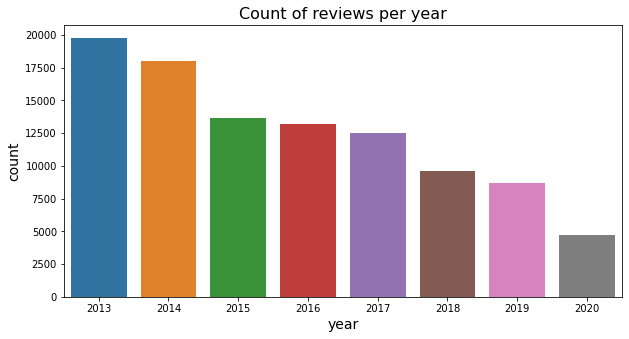

In [34]:
plt.figure(figsize=(10,5))
ax = sns.countplot(sorted_review_year)
plt.xlabel("year", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.title('Count of reviews per year', size = 16)
plt.show()

In [35]:
# example of data point with null genre 
movies[movies['genre'].isna() == True].iloc[0,7:]

Documentary    0
Adventure      0
Animation      0
Thriller       0
Reality-TV     0
Action         0
Adult          0
Game-Show      0
Fantasy        0
Crime          0
Talk-Show      0
Drama          0
Family         0
History        0
News           0
Sci-Fi         0
Short          0
Biography      0
War            0
Romance        0
Musical        0
Film-Noir      0
Sport          0
Mystery        0
Western        0
Horror         0
Comedy         0
Music          0
Name: 3, dtype: object

## Q: What are the top 10 highest rated movies in twitter?

### Data Modeling

In [36]:
# Sorting according rating in descending order
reviews.sort_values(['rating'], ascending = False).head(10)

,user_id,movie_id,rating,timestamp,date
71463,5560,206634,10,1508549128,2017-10-21 01:25:28
28776,2089,373883,10,1540587141,2018-10-26 20:52:21
60500,4515,68646,10,1490921444,2017-03-31 00:50:44
60501,4515,86879,10,1499083869,2017-07-03 12:11:09
60502,4515,95953,10,1490312703,2017-03-23 23:45:03
11902,829,4196776,10,1469695719,2016-07-28 08:48:39
60503,4515,102926,10,1490048220,2017-03-20 22:17:00
60504,4515,107207,10,1493646677,2017-05-01 13:51:17
60505,4515,109830,10,1491256118,2017-04-03 21:48:38
60506,4515,114369,10,1493994301,2017-05-05 14:25:01


As you can see many movies are rated 10, which doesnot give us a useful insight. 
Here same user have rated different movies and same movies are being rated by different users.<br>
So, finding the mean rating for each movie and sorting them will give us a deeper insight

In [37]:
# finding the average for each movie and sorting it descending order
avg_mov_ratings = reviews.groupby(['movie_id'])['rating'].mean().sort_values(ascending = False)

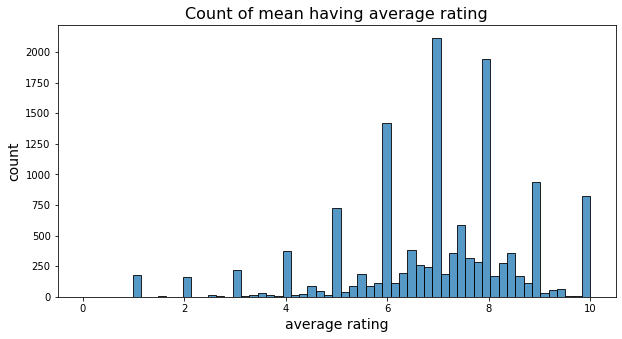

In [38]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = avg_mov_ratings)
ax.set(xlabel='average rating')
plt.xlabel("average rating", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.title('Count of mean having average rating', size = 16)
plt.show()

So we know that we have around 800 movies having perfect 10 as average rating, Now it's time retrive those movies names

In [39]:
movies_id_10 = avg_mov_ratings[avg_mov_ratings.values == 10].index.values

In [40]:
highest_rated_movies = movies[movies.movie_id.isin(movies_id_10)]['movie']

In [49]:
# recommend random 10 highest rated movies
print(highest_rated_movies.sample(10).values)

['Mad As Hell (2014)' 'The In Crowd (2000)' 'Cries from Syria (2017)'
 'Permanent Record (1988)' 'Broadway Danny Rose (1984)'
 'Ningen no jôken (1961)' 'The Loveless (1981)'
 'Du bi quan wang da po xue di zi (1976)' 'De eso no se habla (1993)'
 'Unrest (2017)']


## Insight
From around 800 movies having 10 mean rating in Twitter, the above list shows random 10 samples

## Q: What are the top 10 most reviewed movies on twitter?

### Data Modeling

In [50]:
# finding the no. of reviews per movie
reviews.groupby(['movie_id'])['user_id'].count().sort_values(ascending = False)[:10]

movie_id
1454468    358
8579674    345
993846     332
7286456    324
816692     324
770828     305
1300854    276
1535109    265
1670345    262
816711     259
Name: user_id, dtype: int64

In [51]:
popular_movies_idx =  reviews.groupby(['movie_id'])['user_id'].count().sort_values(ascending = False).index.values

In [52]:
popular_movies_idx

array([ 1454468,  8579674,   993846, ...,   471957,   471930, 12131262],
      dtype=int64)

In [53]:
def get_movies(df, idxs):
    ''' getting the movie name from the dataframe
        inputs-
            df: input dataframe
            idxs: list of movie indexes
        output-
            result: list of movie names
    '''
    result = []
    for idx in idxs:
        result.append(df[df.movie_id == idx]['movie'].values[0])
    return result

In [54]:
sorted_popular_movies = get_movies(movies, popular_movies_idx[:10])

In [56]:
sort_pop_reviews = reviews.groupby(['movie_id'])['user_id'].count().sort_values(ascending = False).values

In [58]:
for movie, review in zip(sorted_popular_movies, sort_pop_reviews):
    print(movie,"reviews:",review)

Gravity (2013) reviews: 358
1917 (2019) reviews: 345
The Wolf of Wall Street (2013) reviews: 332
Joker (2019) reviews: 324
Interstellar (2014) reviews: 324
Man of Steel (2013) reviews: 305
Iron Man Three (2013) reviews: 276
Captain Phillips (2013) reviews: 265
Now You See Me (2013) reviews: 262
World War Z (2013) reviews: 259


### Insight
The list above is the top 10 popular movies in twitter, Honestly I agree with this list, I have watched all of them.

## Q: Which twitter users are potential candidates to get hired from a movie reviewing company?

### Data Modeling

In [98]:
# getting the no. of movies reviewed by each user
reviews_per_user = reviews.groupby(['user_id'])['movie_id'].count().sort_values(ascending = False)

In [115]:
reviews_per_user[:10]

user_id
2089    1377
3440    1274
2213    1180
5867     675
7201     605
98       595
4096     571
1120     505
4307     466
3442     455
Name: movie_id, dtype: int64

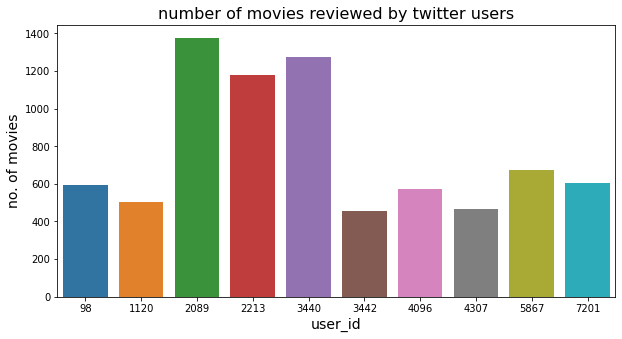

In [141]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = reviews_per_user[:10].index.values, y = reviews_per_user[:10].values)
plt.xlabel("user_id", fontsize = 14)
plt.ylabel("no. of movies", fontsize = 14)
plt.title('number of movies reviewed by twitter users', size = 16)
plt.show()

### Insight
* From the graph we can conclude that **twitter user id's - 2089, 2213, 3440** are the perfect candidates to get hired from movie reviewing companies, each candidate have atleast reviewed 1000 movies.

## Q: Which genres are popular for movies?

### Data Modeling

In [129]:
genres = movies.iloc[:,7:]

In [134]:
sorted_genres = genres.sum(axis= 0).sort_values(ascending = False)

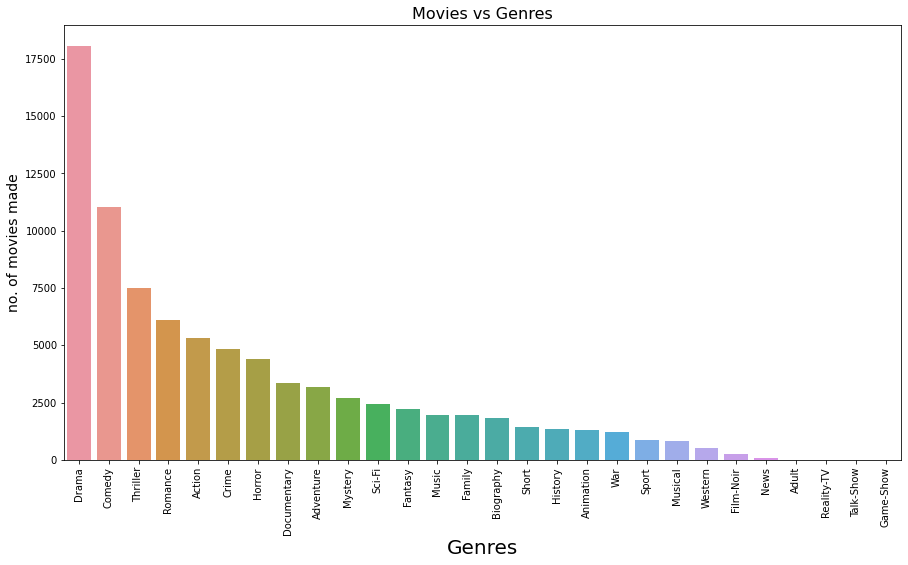

In [140]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = sorted_genres.index.values, y =sorted_genres.values)
plt.xlabel("Genres", fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel("no. of movies made", fontsize = 14)
plt.title('Movies vs Genres', size = 16)
plt.show()

### Insight
* From the above graph we found that **drama** is the most popular genre for making movies, followed by **comedy , thriller and romance**.
* Since we experience drama more often in our daily than the other categories, it is more relatable to us. Hence it is easier to make movies. Also drama movies requires more attention in acting rather than vfx, cgi, props and other expensive resoureces in movie making. That is my explaination of the trend above.